In [ ]:
import numpy as np

import pandas as pd

apple=pd.read_csv("PredictionsF_AAPL.csv")
apple=apple.iloc[:,1]
bac=pd.read_csv("PredictionsF_BAC.csv")
bac=bac.iloc[:,1]
pfe=pd.read_csv("PredictionsF_PFE.csv")
pfe=pfe.iloc[:,1]
pg=pd.read_csv("PredictionsF_PG.csv")
pg=pg.iloc[:,1]
xom=pd.read_csv("PredictionsF_XOM.csv")
xom=xom.iloc[:,1]

mar=pd.read_csv("MarketIndex.csv")
mar=mar.iloc[:,6]

#Standard Deviations of the predicted stocks

stdAPPL=np.std(apple)
stdBAC=np.std(bac)
stdPFE=np.std(pfe)
stdPG=np.std(pg)
stdXOM=np.std(xom)


Correlation between all stocks and the market taken two at a time

In [ ]:
import numpy as np

capplebac=np.corrcoef(apple,bac)

capplepfe=np.corrcoef(apple,pfe)

capplepg=np.corrcoef(apple,pg)

capplexom=np.corrcoef(apple,xom)

cbacpfe=np.corrcoef(bac,pfe)

cbacpg=np.corrcoef(bac,pg)

cbacxom=np.corrcoef(bac,xom)

cpfepg=np.corrcoef(pfe,pg)

cpfexom=np.corrcoef(pfe,xom)

cpgxom=np.corrcoef(pg,xom)

#Covariance of stocks as two

coapplebac=np.cov(apple,bac)

coapplepfe=np.cov(apple,pfe)

coapplepg=np.cov(apple,pg)

coapplexom=np.cov(apple,xom)

cobacpfe=np.cov(bac,pfe)

cobacpg=np.cov(bac,pg)

cobacxom=np.cov(bac,xom)

copfepg=np.cov(pfe,pg)

copfexom=np.cov(pfe,xom)

copgxom=np.cov(pg,xom)

#Covariance with market

coapplemar=np.cov(apple,mar)
cobacmar=np.cov(bac,mar)
copfemar=np.cov(pfe,mar)
copgmar=np.cov(pg,mar)
coxommar=np.cov(xom,mar)

print(cpgxom)

[[1.         0.18262236]
 [0.18262236 1.        ]]


In [ ]:
##Correlations based on the correlation matrix

capplebac=0.896

capplepfe=0.908

capplepg=0.081

capplexom=0.38

cbacpfe=0.805

cbacpg=-0.07

cbacxom=0.387

cpfepg=0.263

cpfexom=0.571

cpgxom=0.182



**Expected returns of stocks and market**

In [ ]:
 betaapple=coapplemar/1.45669964=  #each stock beta value
 betabac=cobacmar/1.45669964 
 betapfe=copfemar/1.45669964
 betapg=copgmar/1.45669964  
 betaxom=coxommar/1.45669964
# betaapple=1.2
# betabac=1.24
# betapfe=0.71
# betapg=0.58
# betaxom=1.04

In [ ]:
#expectedreturnof a stock using CAPM //risk free rate = 3%
#expected return of market=((ending value/initial value)^(1/2))-1
#expected return of each stock=3+betastock(expected return of market-3)  // we willl ge expected return of each stock 
expmarket=(np.sqrt(mar[len(mar)-1]/mar[0]))-1

expapple=3+betaapple*(expmarket-3)
exppfe=3+betapfe*(expmarket-3)
expbac=3+betabac*(expmarket-3)
exppg=3+betapg*(expmarket-3)
expxom=3+betaxom*(expmarket-3)

# expmarket=17.3
# expapple=6.25
# exppg=17
# exppfe=7
# expbac=42
# expxom=14.25
expmarket


0.02752188515637255

Standard deviation of portfolio // Risk

In [ ]:

import numpy as np

# w1=0
# w2=0
# w3=0
# w4=0
# w5=1

df=pd.DataFrame({"w1":0,"w2":0,"w3":0,"w4":0,"w5":0,"sigport":0,"retport":0},index=[0]) 

for w1 in np.arange(0, 1, 0.05):
  for w2 in np.arange(0, 1, 0.05):
    for w3 in np.arange(0, 1, 0.05):
      for w4 in np.arange(0, 1, 0.05):
        for w5 in np.arange(0, 1, 0.05):
          if(w1+w2+w3+w4+w5==1):
            term1 = w1*w1*stdAPPL*stdAPPL
            term2 = w2*w2*stdBAC*stdBAC
            term3 = w3*w3*stdPFE*stdPFE
            term4 = w4*w4*stdPG*stdPG
            term5 = w5*w5*stdXOM*stdXOM
            term6 = 2 * w1 * w2 * capplebac * stdAPPL * stdBAC
            term7 = 2 * w1 * w3 * capplepfe * stdAPPL * stdPFE
            term8 = 2 * w1 * w4 * capplepg * stdAPPL * stdPG
            term9 = 2 * w1 * w5 * capplexom * stdAPPL * stdXOM
            term10 = 2 * w2 * w3 * cbacpfe * stdBAC * stdPFE
            term11 = 2 * w2 * w4 * cbacpg * stdBAC * stdPG
            term12 = 2 * w2 * w5 * cbacxom * stdBAC * stdXOM
            term13 = 2 * w3 * w4 * cpfepg * stdPFE * stdPG
            term14 = 2 * w3 * w5 * cpfexom * stdPFE * stdXOM
            term15 = 2 * w4 * w5 * cpgxom * stdPG * stdXOM


            sigport=np.sqrt(term1+term2+term3+term4+term5+term6+term7+term8+term9+term10+term11+term12+term13+term14+term15)
            retport=w1*expapple+w2*expbac+w3*exppfe+w4*exppg+w5*expxom
            # df.append({"w1":w1,"w2":w2,"w3":w3,"w4":w4,"w5":w5,"sigport":sigport,"retport":retport},ignore_index=True)
            df.loc[len(df.index)] = [w1,w2,w3,w4,w5,sigport,retport]




            print(w1,w2,w3,w4,w5)
            print(sigport,retport)
            print("break")


Streaming output truncated to the last 5000 lines.
1.2961899484403931 14.8
break
0.35000000000000003 0.15000000000000002 0.15000000000000002 0.15000000000000002 0.2
1.3032176253551497 14.937500000000002
break
0.35000000000000003 0.15000000000000002 0.15000000000000002 0.2 0.15000000000000002
1.3104264128958125 15.075000000000003
break
0.35000000000000003 0.15000000000000002 0.15000000000000002 0.25 0.1
1.3178133388966455 15.212500000000002
break
0.35000000000000003 0.15000000000000002 0.15000000000000002 0.30000000000000004 0.05
1.3253754248186167 15.350000000000003
break
0.35000000000000003 0.15000000000000002 0.15000000000000002 0.35000000000000003 0.0
1.3331096898727421 15.4875
break
0.35000000000000003 0.15000000000000002 0.2 0.0 0.30000000000000004
1.458938974783181 14.162500000000001
break
0.35000000000000003 0.15000000000000002 0.2 0.05 0.25
1.4644619338043365 14.3
break
0.35000000000000003 0.15000000000000002 0.2 0.1 0.2
1.4701591706215829 14.437500000000002
break
0.35000000000

In [ ]:
df

,w1,w2,w3,w4,w5,sigport,retport
0,0.00,0.00,0.00,0.00,0.00,0.000000,0.0000
1,0.00,0.00,0.00,0.05,0.95,160.575889,14.3875
2,0.00,0.00,0.00,0.10,0.90,221.031669,14.5250
3,0.00,0.00,0.00,0.15,0.85,263.080251,14.6625
4,0.00,0.00,0.00,0.20,0.80,294.708798,14.8000
...,...,...,...,...,...,...,...
9104,0.90,0.10,0.00,0.00,0.00,811.411905,9.8250
9105,0.95,0.00,0.00,0.00,0.05,821.196731,6.6500
9106,0.95,0.00,0.00,0.05,0.00,669.733868,6.7875
9107,0.95,0.00,0.05,0.00,0.00,2791.124639,6.2875


In [ ]:
#Converting the portfolio weight with standard deviations and retirns 
df.to_excel("Portweights.xlsx",sheet_name="S1")

Return of portfolio


In [ ]:
# betaapple=coapplemar/1.45669964=  #each stock beta value
# betabac=cobacmar/1.45669964 
# betapfe=copfemar/1.45669964
# betapg=copgmar/1.45669964  
# betaxom=coxommar/1.45669964
betaapple=0.391645
betabac=1.01805
betapfe=0.835221
betapg=0.812499
betaxom=0.45943


In [ ]:
mar[len(mar)-1]

In [ ]:
#expectedreturnof a stock using CAPM //risk free rate = 3%
#expected return of market=((ending value/initial value)^(1/2))-1
#expected return of each stock=3+betastock(expected return of market-3)  // we willl ge expected return of each stock 
expmarket=(np.sqrt(mar[len(mar)-1]/mar[0]))-1

expapple=3+betaapple*(expmarket-3)
exppfe=3+betapfe*(expmarket-3)
expbac=3+betabac*(expmarket-3)
exppg=3+betapg*(expmarket-3)
expxom=3+betaxom*(expmarket-3)

expmarket


Sharpe ratio of portfolio

In [ ]:
#retun of portfolio=summation of weights of stocks*expected return of stock (before step)

Values of x:  [-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10]
Values of y:  [-48.4 -40.  -32.4 -25.6 -19.6 -14.4 -10.   -6.4  -3.6  -1.6  -0.4  -0.
  -0.4  -1.6  -3.6  -6.4 -10.  -14.4 -19.6 -25.6 -32.4 -40. ]


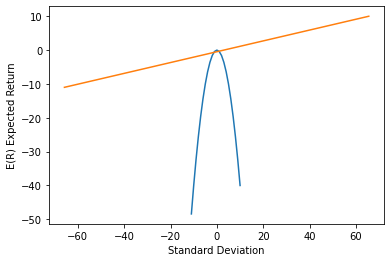

In [37]:
import matplotlib.pyplot as plt

x = np.arange(-11, 11, 1)

w = np.arange(-11, 11, 1)

y=-(0.5*x*x*0.8)
z=3+6.25*w

print('Values of x: ', x)
print('Values of y: ', y)
plt.plot(x, y)
plt.plot(z,w)

plt.xlabel("Standard Deviation")
plt.ylabel("E(R) Expected Return")
plt.show()